# Pair programming Gestión de Nulos

Ejercicios gestión de nulos.
En este pair programming usaremos el csv que generamos en el pair programming de ayer. 

El objetivo del ejercicio es identificar las columnas que contienen valores nulos y aplicar un proceso de imputación para manejarlos de manera adecuada.

In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
# Leemosel csv y lo pasamos a dataframe
df_world = pd.read_csv('world_continent.csv', index_col=0)
df_world

,country,density,abbreviation,agriculturalland,landarea,armedforcessize,birthrate,callingcode,capital/majorcity,co2-emissions,cpi,cpichange,currency-code,fertilityrate,forestedarea,gasolineprice,gdp,grossprimaryeducationenrollment,grosstertiaryeducationenrollment,infantmortality,largestcity,lifeexpectancy,maternalmortalityratio,minimumwage,officiallanguage,outofpockethealthexpenditure,physiciansperthousand,population,populationlaborforceparticipation,taxrevenue,totaltaxrate,unemploymentrate,urban_population,latitude,longitude,Continent
0,Afghanistan,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,41.153332,20.168331,Europa
2,Algeria,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,28.033886,1.659626,Asia
3,Andorra,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,42.506285,1.521801,Europa
4,Angola,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,-11.202692,17.873887,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,912050.0,343000.0,17.88,58.0,Caracas,164175.0,2740.27,254.9,VED,2.27,52.7,0.00,4.823593e+11,97.2,79.3,21.4,Caracas,72.1,125.0,0.01,Spanish,45.8,1.92,28515829.0,59.7,NaN,73.3,8.80,25162368.0,6.423750,-66.589730,America
191,Vietnam,314.0,VN,39.3,331210.0,522000.0,16.75,84.0,Hanoi,192668.0,163.52,2.8,VND,2.05,48.1,0.80,2.619212e+11,110.6,28.5,16.5,Ho Chi Minh City,75.3,43.0,0.73,Vietnamese,43.5,0.82,96462106.0,77.4,19.1,37.6,2.01,35332140.0,14.058324,108.277199,Asia
192,Yemen,56.0,YE,44.6,527968.0,40000.0,30.45,967.0,Sanaa,10609.0,157.58,8.1,YER,3.79,1.0,0.92,2.691440e+10,93.6,10.2,42.9,Sanaa,66.1,164.0,NaN,Arabic,81.0,0.31,29161922.0,38.0,NaN,26.6,12.91,10869523.0,15.552727,48.516388,Asia
193,Zambia,25.0,ZM,32.1,752618.0,16000.0,36.19,260.0,Lusaka,5141.0,212.31,9.2,ZMW,4.63,65.2,1.40,2.306472e+10,98.7,4.1,40.4,Lusaka,63.5,213.0,0.24,English,27.5,1.19,17861030.0,74.6,16.2,15.6,11.43,7871713.0,-13.133897,27.849332,Africa


1. Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

In [4]:
df_world.columns

Index(['country', 'density', 'abbreviation', 'agriculturalland', 'landarea',
       'armedforcessize', 'birthrate', 'callingcode', 'capital/majorcity',
       'co2-emissions', 'cpi', 'cpichange', 'currency-code', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'largestcity', 'lifeexpectancy',
       'maternalmortalityratio', 'minimumwage', 'officiallanguage',
       'outofpockethealthexpenditure', 'physiciansperthousand', 'population',
       'populationlaborforceparticipation', 'taxrevenue', 'totaltaxrate',
       'unemploymentrate', 'urban_population', 'latitude', 'longitude',
       'Continent'],
      dtype='object')

In [5]:
df_world_nulos = pd.DataFrame((df_world.isnull().sum()/ df_world.shape[0])*100)
df_world_nulos[((df_world.isnull().sum()/ df_world.shape[0])*100) > 0]

,0
abbreviation,3.589744
agriculturalland,3.589744
landarea,0.512821
armedforcessize,12.307692
birthrate,3.076923
callingcode,0.512821
capital/majorcity,1.538462
co2-emissions,3.589744
cpi,8.717949
cpichange,8.205128


2. Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para
manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

- Categóricas

In [6]:
nulos_world_cat = df_world[df_world.columns[df_world.isnull().any()]].select_dtypes(include='object')
nulos_world_cat.columns

Index(['abbreviation', 'capital/majorcity', 'currency-code', 'largestcity',
       'officiallanguage'],
      dtype='object')

In [7]:
for col in nulos_world_cat.columns:
    print(col)
    display(df_world[col].value_counts()/df_world.shape[0])
    print("-------------------")

abbreviation


AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: abbreviation, Length: 188, dtype: float64

-------------------
capital/majorcity


Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: capital/majorcity, Length: 192, dtype: float64

-------------------
currency-code


EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: currency-code, Length: 133, dtype: float64

-------------------
largestcity


S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: largestcity, Length: 188, dtype: float64

-------------------
officiallanguage


English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: officiallanguage, Length: 76, dtype: float64

-------------------


- Numéricas

In [8]:
nulos_world_num = df_world[df_world.columns[df_world.isnull().any()]].select_dtypes(include=np.number)
nulos_world_num.columns

Index(['agriculturalland', 'landarea', 'armedforcessize', 'birthrate',
       'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate',
       'forestedarea', 'gasolineprice', 'gdp',
       'grossprimaryeducationenrollment', 'grosstertiaryeducationenrollment',
       'infantmortality', 'lifeexpectancy', 'maternalmortalityratio',
       'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand',
       'population', 'populationlaborforceparticipation', 'taxrevenue',
       'totaltaxrate', 'unemploymentrate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')

In [9]:
for col in nulos_world_num.columns:
    print(col)
    display(df_world[col].isnull().sum()/df_world.shape[0])
    print("-------------------")

agriculturalland


0.035897435897435895

-------------------
landarea


0.005128205128205128

-------------------
armedforcessize


0.12307692307692308

-------------------
birthrate


0.03076923076923077

-------------------
callingcode


0.005128205128205128

-------------------
co2-emissions


0.035897435897435895

-------------------
cpi


0.08717948717948718

-------------------
cpichange


0.08205128205128205

-------------------
fertilityrate


0.035897435897435895

-------------------
forestedarea


0.035897435897435895

-------------------
gasolineprice


0.10256410256410256

-------------------
gdp


0.010256410256410256

-------------------
grossprimaryeducationenrollment


0.035897435897435895

-------------------
grosstertiaryeducationenrollment


0.06153846153846154

-------------------
infantmortality


0.03076923076923077

-------------------
lifeexpectancy


0.041025641025641026

-------------------
maternalmortalityratio


0.07179487179487179

-------------------
minimumwage


0.23076923076923078

-------------------
outofpockethealthexpenditure


0.035897435897435895

-------------------
physiciansperthousand


0.035897435897435895

-------------------
population


0.005128205128205128

-------------------
populationlaborforceparticipation


0.09743589743589744

-------------------
taxrevenue


0.13333333333333333

-------------------
totaltaxrate


0.06153846153846154

-------------------
unemploymentrate


0.09743589743589744

-------------------
urban_population


0.02564102564102564

-------------------
latitude


0.005128205128205128

-------------------
longitude


0.005128205128205128

-------------------


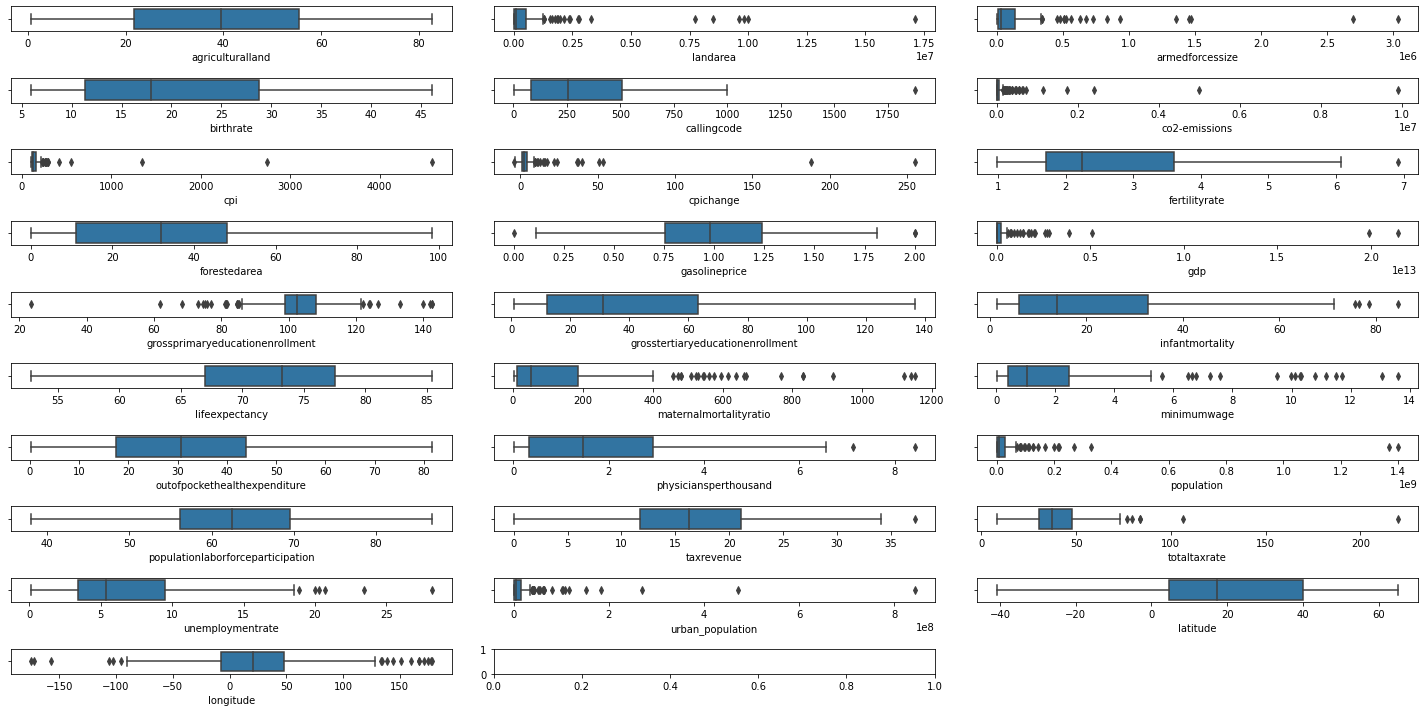

In [10]:
fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_world_num.columns):
    sns.boxplot(x = col, data = df_world, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);

In [11]:
nulos_world_num.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
agriculturalland,188.0,3.911755e+01,2.178305e+01,6.000000e-01,3.960000e+01,8.260000e+01
landarea,194.0,6.896244e+05,1.921609e+06,0.000000e+00,1.195110e+05,1.709824e+07
armedforcessize,171.0,1.592749e+05,3.806288e+05,0.000000e+00,3.100000e+04,3.031000e+06
birthrate,189.0,2.021497e+01,9.945774e+00,5.900000e+00,1.795000e+01,4.608000e+01
callingcode,194.0,3.605464e+02,3.232364e+02,1.000000e+00,2.555000e+02,1.876000e+03
co2-emissions,188.0,1.777992e+05,8.387903e+05,1.100000e+01,1.230300e+04,9.893038e+06
cpi,178.0,1.904610e+02,3.979474e+02,9.903000e+01,1.253400e+02,4.583710e+03
cpichange,179.0,6.722346e+00,2.445041e+01,-4.300000e+00,2.300000e+00,2.549000e+02
fertilityrate,188.0,2.698138e+00,1.282267e+00,9.800000e-01,2.245000e+00,6.910000e+00
forestedarea,188.0,3.201543e+01,2.379133e+01,0.000000e+00,3.200000e+01,9.830000e+01


In [12]:
col_mediana = ['agriculturalland', 'forestedarea', 'grossprimaryeducationenrollment', 'populationlaborforceparticipation','taxrevenue' ]
col_imputar = ['landarea', 'armedforcessize', 'birthrate', 'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate', 'gasolineprice', 'gdp', 'grosstertiaryeducationenrollment', 'infantmortality', 'lifeexpectancy', 'maternalmortalityratio', 'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand', 'population', 'totaltaxrate', 'unemploymentrate', 'urban_population']

# dejamos nulos en latitude y longitude porque no nos parece que sea correcto imputar valores o ponerles la media/mediana
# en posteriores estudios intentaríamos no tener en cuanta esats columnas

3. Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para
llenar los valores nulos en las columnas.

- Categoricas

In [13]:
col_desconocido = ['abbreviation', 'capital/majorcity', 'largestcity', 'officiallanguage', 'currency-code']
#col 'currency-code' se podría extrapolar moda (EUR) if continet == 'Europa'

In [14]:
for col in col_desconocido:
    df_world[col] = df_world[col].fillna("Unknown")

- Numéricas

In [15]:
for col in col_mediana:
   mediana = df_world[col].median()
   df_world[col] = df_world[col].fillna(mediana) 

In [16]:
df_world[col_mediana].describe().T

,count,mean,std,min,25%,50%,75%,max
agriculturalland,195.0,39.134872,21.386637,0.6,22.65,39.60,54.85,82.6
forestedarea,195.0,32.014872,23.358162,0.0,11.45,32.00,47.45,98.3
grossprimaryeducationenrollment,195.0,102.473077,12.912165,23.4,99.35,102.55,107.55,142.5
populationlaborforceparticipation,195.0,62.710000,9.975707,38.0,57.25,62.45,68.30,86.8
taxrevenue,195.0,16.537436,6.479029,0.0,12.55,16.30,20.30,37.2


In [17]:
df_world_copy = df_world.copy()

In [18]:
# hemos dicho que para las tres columnas restantes aplicaremos los dos métodos para luego compararlos, empezaremos por el IterativeImputer
# instanciamos las clases
imputer_iterative_world = IterativeImputer(max_iter = 20, random_state = 42)

# ajustamos y tranformamos los datos
imputer_iterative_imputado_world = imputer_iterative_world.fit_transform(df_world_copy[col_imputar])

# comprobamos que es lo que nos devuelve, que en este caso es un array también
imputer_iterative_imputado_world

array([[6.5223000e+05, 3.2300000e+05, 3.2490000e+01, ..., 7.1400000e+01,
        1.1120000e+01, 9.7972730e+06],
       [2.8748000e+04, 9.0000000e+03, 1.1780000e+01, ..., 3.6600000e+01,
        1.2330000e+01, 1.7475930e+06],
       [2.3817410e+06, 3.1700000e+05, 2.4280000e+01, ..., 6.6100000e+01,
        1.1700000e+01, 3.1510100e+07],
       ...,
       [5.2796800e+05, 4.0000000e+04, 3.0450000e+01, ..., 2.6600000e+01,
        1.2910000e+01, 1.0869523e+07],
       [7.5261800e+05, 1.6000000e+04, 3.6190000e+01, ..., 1.5600000e+01,
        1.1430000e+01, 7.8717130e+06],
       [3.9075700e+05, 5.1000000e+04, 3.0680000e+01, ..., 3.1600000e+01,
        4.9500000e+00, 4.7173050e+06]])

In [19]:
# ['landarea', 'armedforcessize', 'birthrate', 'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate', 'gasolineprice', 'gdp', 'grosstertiaryeducationenrollment', 'infantmortality', 'lifeexpectancy', 'maternalmortalityratio', 'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand', 'population', 'totaltaxrate', 'unemploymentrate', 'urban_population']
df_world_copy[['landarea_i', 'armedforcessize_i', 'birthrate_i', 'callingcode_i', 'co2-emissions_i', 'cpi_i', 'cpichange_i', 'fertilityrate_i', 'gasolineprice_i', 'gdp_i', 'grosstertiaryeducationenrollment_i', 'infantmortality_i', 'lifeexpectancy_i', 'maternalmortalityratio_i', 'minimumwage_i', 'outofpockethealthexpenditure_i', 'physiciansperthousand_i', 'population_i', 'totaltaxrate_i', 'unemploymentrate_i', 'urban_population_i']] = imputer_iterative_imputado_world

In [20]:
['landarea', 'armedforcessize', 'birthrate', 'callingcode', 'co2-emissions', 'cpi', 'cpichange', 'fertilityrate', 'gasolineprice', 'gdp', 'grosstertiaryeducationenrollment', 'infantmortality', 'lifeexpectancy', 'maternalmortalityratio', 'minimumwage', 'outofpockethealthexpenditure', 'physiciansperthousand', 'population', 'totaltaxrate', 'unemploymentrate', 'urban_population']

['landarea',
 'armedforcessize',
 'birthrate',
 'callingcode',
 'co2-emissions',
 'cpi',
 'cpichange',
 'fertilityrate',
 'gasolineprice',
 'gdp',
 'grosstertiaryeducationenrollment',
 'infantmortality',
 'lifeexpectancy',
 'maternalmortalityratio',
 'minimumwage',
 'outofpockethealthexpenditure',
 'physiciansperthousand',
 'population',
 'totaltaxrate',
 'unemploymentrate',
 'urban_population']

In [21]:
df_world_copy[['landarea_i', 'armedforcessize_i', 'birthrate_i', 'callingcode_i', 'co2-emissions_i', 'cpi_i', 'cpichange_i', 'fertilityrate_i', 'gasolineprice_i', 'gdp_i', 'grosstertiaryeducationenrollment_i', 'infantmortality_i', 'lifeexpectancy_i', 'maternalmortalityratio_i', 'minimumwage_i', 'outofpockethealthexpenditure_i', 'physiciansperthousand_i', 'population_i', 'totaltaxrate_i', 'unemploymentrate_i', 'urban_population_i']]

,landarea_i,armedforcessize_i,birthrate_i,callingcode_i,co2-emissions_i,cpi_i,cpichange_i,fertilityrate_i,gasolineprice_i,gdp_i,grosstertiaryeducationenrollment_i,infantmortality_i,lifeexpectancy_i,maternalmortalityratio_i,minimumwage_i,outofpockethealthexpenditure_i,physiciansperthousand_i,population_i,totaltaxrate_i,unemploymentrate_i,urban_population_i
0,652230.0,323000.000000,32.49,93.0,8672.0,149.900000,2.300000,4.47,0.70,1.910135e+10,9.700000,47.9,64.500000,638.000000,0.430000,78.4,0.28,38041754.0,71.400000,11.120000,9797273.0
1,28748.0,9000.000000,11.78,355.0,4536.0,119.050000,1.400000,1.62,1.36,1.527808e+10,55.000000,7.8,78.500000,15.000000,1.120000,56.9,1.20,2854191.0,36.600000,12.330000,1747593.0
2,2381741.0,317000.000000,24.28,213.0,150006.0,151.360000,2.000000,3.02,0.28,1.699882e+11,51.400000,20.1,76.700000,112.000000,0.950000,28.1,1.72,43053054.0,66.100000,11.700000,31510100.0
3,468.0,45892.779105,7.20,376.0,469.0,102.429048,2.836768,1.27,1.51,3.154058e+09,63.751866,2.7,80.442372,-44.496136,6.630000,36.4,3.33,77142.0,39.283017,6.798207,67873.0
4,1246700.0,117000.000000,40.73,244.0,34693.0,261.730000,17.100000,5.52,0.97,9.463542e+10,9.300000,51.6,60.800000,241.000000,0.710000,33.4,0.21,31825295.0,49.100000,6.890000,21061025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,912050.0,343000.000000,17.88,58.0,164175.0,2740.270000,254.900000,2.27,0.00,4.823593e+11,79.300000,21.4,72.100000,125.000000,0.010000,45.8,1.92,28515829.0,73.300000,8.800000,25162368.0
191,331210.0,522000.000000,16.75,84.0,192668.0,163.520000,2.800000,2.05,0.80,2.619212e+11,28.500000,16.5,75.300000,43.000000,0.730000,43.5,0.82,96462106.0,37.600000,2.010000,35332140.0
192,527968.0,40000.000000,30.45,967.0,10609.0,157.580000,8.100000,3.79,0.92,2.691440e+10,10.200000,42.9,66.100000,164.000000,-0.568852,81.0,0.31,29161922.0,26.600000,12.910000,10869523.0
193,752618.0,16000.000000,36.19,260.0,5141.0,212.310000,9.200000,4.63,1.40,2.306472e+10,4.100000,40.4,63.500000,213.000000,0.240000,27.5,1.19,17861030.0,15.600000,11.430000,7871713.0


In [22]:
# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_world_copy[['landarea_i', 'armedforcessize_i', 'birthrate_i', 'callingcode_i', 'co2-emissions_i', 'cpi_i', 'cpichange_i', 'fertilityrate_i', 'gasolineprice_i', 'gdp_i', 'grosstertiaryeducationenrollment_i', 'infantmortality_i', 'lifeexpectancy_i', 'maternalmortalityratio_i', 'minimumwage_i', 'outofpockethealthexpenditure_i', 'physiciansperthousand_i', 'population_i', 'totaltaxrate_i', 'unemploymentrate_i', 'urban_population_i']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
landarea_i                            0
armedforcessize_i                     0
birthrate_i                           0
callingcode_i                         0
co2-emissions_i                       0
cpi_i                                 0
cpichange_i                           0
fertilityrate_i                       0
gasolineprice_i                       0
gdp_i                                 0
grosstertiaryeducationenrollment_i    0
infantmortality_i                     0
lifeexpectancy_i                      0
maternalmortalityratio_i              0
minimumwage_i                         0
outofpockethealthexpenditure_i        0
physiciansperthousand_i               0
population_i                          0
totaltaxrate_i                        0
unemploymentrate_i                    0
urban_population_i                    0
dtype: int64 nulos


copiado solo, falta cambiar

In [23]:
# hagamos ahora lo mismo con el KNNImputer. NOTA, la ejecución de esta celda puede tardar un ratito

# instanciamos la clase del KNNImputer
imputer_knn_world= KNNImputer(n_neighbors = 5)

# ajustamos y transformamos los datos
imputer_knn_imputado_world = imputer_knn_world.fit_transform(df_world_copy[col_imputar])

# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado_world

array([[6.5223000e+05, 3.2300000e+05, 3.2490000e+01, ..., 7.1400000e+01,
        1.1120000e+01, 9.7972730e+06],
       [2.8748000e+04, 9.0000000e+03, 1.1780000e+01, ..., 3.6600000e+01,
        1.2330000e+01, 1.7475930e+06],
       [2.3817410e+06, 3.1700000e+05, 2.4280000e+01, ..., 6.6100000e+01,
        1.1700000e+01, 3.1510100e+07],
       ...,
       [5.2796800e+05, 4.0000000e+04, 3.0450000e+01, ..., 2.6600000e+01,
        1.2910000e+01, 1.0869523e+07],
       [7.5261800e+05, 1.6000000e+04, 3.6190000e+01, ..., 1.5600000e+01,
        1.1430000e+01, 7.8717130e+06],
       [3.9075700e+05, 5.1000000e+04, 3.0680000e+01, ..., 3.1600000e+01,
        4.9500000e+00, 4.7173050e+06]])

In [24]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_world_copy[['landarea_k', 'armedforcessize_k', 'birthrate_k', 'callingcode_k', 'co2-emissions_k', 'cpi_k', 'cpichange_k', 'fertilityrate_k', 'gasolineprice_k', 'gdp_k', 'grosstertiaryeducationenrollment_k', 'infantmortality_k', 'lifeexpectancy_k', 'maternalmortalityratio_k', 'minimumwage_k', 'outofpockethealthexpenditure_k', 'physiciansperthousand_k', 'population_k', 'totaltaxrate_k', 'unemploymentrate_k', 'urban_population_k']] = imputer_knn_imputado_world

In [25]:
df_world_copy[['landarea_k','armedforcessize_k','birthrate_k','callingcode_k','co2-emissions_k','cpi_k','cpichange_k','fertilityrate_k','gasolineprice_k','gdp_k','grosstertiaryeducationenrollment_k','infantmortality_k','lifeexpectancy_k','maternalmortalityratio_k','minimumwage_k','outofpockethealthexpenditure_k','physiciansperthousand_k','population_k','totaltaxrate_k','unemploymentrate_k','urban_population_k']]

,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gasolineprice_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,lifeexpectancy_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,physiciansperthousand_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,0.70,1.910135e+10,9.70,47.9,64.50,638.0,0.430,78.4,0.28,38041754.0,71.40,11.120,9797273.0
1,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.36,1.527808e+10,55.00,7.8,78.50,15.0,1.120,56.9,1.20,2854191.0,36.60,12.330,1747593.0
2,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,0.28,1.699882e+11,51.40,20.1,76.70,112.0,0.950,28.1,1.72,43053054.0,66.10,11.700,31510100.0
3,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,1.51,3.154058e+09,9.82,2.7,63.34,436.8,6.630,36.4,3.33,77142.0,34.84,8.058,67873.0
4,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,0.97,9.463542e+10,9.30,51.6,60.80,241.0,0.710,33.4,0.21,31825295.0,49.10,6.890,21061025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,912050.0,343000.0,17.88,58.0,164175.0,2740.270,254.90,2.27,0.00,4.823593e+11,79.30,21.4,72.10,125.0,0.010,45.8,1.92,28515829.0,73.30,8.800,25162368.0
191,331210.0,522000.0,16.75,84.0,192668.0,163.520,2.80,2.05,0.80,2.619212e+11,28.50,16.5,75.30,43.0,0.730,43.5,0.82,96462106.0,37.60,2.010,35332140.0
192,527968.0,40000.0,30.45,967.0,10609.0,157.580,8.10,3.79,0.92,2.691440e+10,10.20,42.9,66.10,164.0,1.046,81.0,0.31,29161922.0,26.60,12.910,10869523.0
193,752618.0,16000.0,36.19,260.0,5141.0,212.310,9.20,4.63,1.40,2.306472e+10,4.10,40.4,63.50,213.0,0.240,27.5,1.19,17861030.0,15.60,11.430,7871713.0


In [26]:
# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_world_copy[['landarea_k', 'armedforcessize_k', 'birthrate_k', 'callingcode_k', 'co2-emissions_k', 'cpi_k', 'cpichange_k', 'fertilityrate_k', 'gasolineprice_k', 'gdp_k', 'grosstertiaryeducationenrollment_k', 'infantmortality_k', 'lifeexpectancy_k', 'maternalmortalityratio_k', 'minimumwage_k', 'outofpockethealthexpenditure_k', 'physiciansperthousand_k', 'population_k', 'totaltaxrate_k', 'unemploymentrate_k', 'urban_population_k']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
landarea_k                            0
armedforcessize_k                     0
birthrate_k                           0
callingcode_k                         0
co2-emissions_k                       0
cpi_k                                 0
cpichange_k                           0
fertilityrate_k                       0
gasolineprice_k                       0
gdp_k                                 0
grosstertiaryeducationenrollment_k    0
infantmortality_k                     0
lifeexpectancy_k                      0
maternalmortalityratio_k              0
minimumwage_k                         0
outofpockethealthexpenditure_k        0
physiciansperthousand_k               0
population_k                          0
totaltaxrate_k                        0
unemploymentrate_k                    0
urban_population_k                    0
dtype: int64 nulos


In [27]:
df_world_copy.describe()[['landarea', 'landarea_k','landarea_i', 'armedforcessize', 'armedforcessize_k', 'armedforcessize_i', 'birthrate','birthrate_k', 'birthrate_i', 'callingcode', 'callingcode_k', 'callingcode_i', 'co2-emissions', 'co2-emissions_k','co2-emissions_i','cpi', 'cpi_k','cpi_i', 'cpichange', 'cpichange_k','cpichange_i','fertilityrate', 'fertilityrate_k','fertilityrate_i','gasolineprice', 'gasolineprice_k','gasolineprice_i','gdp', 'gdp_k', 'gdp_i', 'grosstertiaryeducationenrollment', 'grosstertiaryeducationenrollment_k','grosstertiaryeducationenrollment_i', 'infantmortality', 'infantmortality_k', 'infantmortality_i', 'lifeexpectancy', 'lifeexpectancy_k','lifeexpectancy_i','maternalmortalityratio', 'maternalmortalityratio_k', 'maternalmortalityratio_i',  'minimumwage', 'minimumwage_k','minimumwage_i', 'outofpockethealthexpenditure', 'outofpockethealthexpenditure_k','outofpockethealthexpenditure_i','physiciansperthousand', 'physiciansperthousand_k','physiciansperthousand_i','population', 'population_k','population_i','totaltaxrate', 'totaltaxrate_k','totaltaxrate_i', 'unemploymentrate', 'unemploymentrate_k','unemploymentrate_i','urban_population', 'urban_population_k', 'urban_population_i']]

,landarea,landarea_k,landarea_i,armedforcessize,armedforcessize_k,armedforcessize_i,birthrate,birthrate_k,birthrate_i,callingcode,callingcode_k,callingcode_i,co2-emissions,co2-emissions_k,co2-emissions_i,cpi,cpi_k,cpi_i,cpichange,cpichange_k,cpichange_i,fertilityrate,fertilityrate_k,fertilityrate_i,gasolineprice,gasolineprice_k,gasolineprice_i,gdp,gdp_k,gdp_i,grosstertiaryeducationenrollment,grosstertiaryeducationenrollment_k,grosstertiaryeducationenrollment_i,infantmortality,infantmortality_k,infantmortality_i,lifeexpectancy,lifeexpectancy_k,lifeexpectancy_i,maternalmortalityratio,maternalmortalityratio_k,maternalmortalityratio_i,minimumwage,minimumwage_k,minimumwage_i,outofpockethealthexpenditure,outofpockethealthexpenditure_k,outofpockethealthexpenditure_i,physiciansperthousand,physiciansperthousand_k,physiciansperthousand_i,population,population_k,population_i,totaltaxrate,totaltaxrate_k,totaltaxrate_i,unemploymentrate,unemploymentrate_k,unemploymentrate_i,urban_population,urban_population_k,urban_population_i
count,1.940000e+02,1.950000e+02,1.950000e+02,1.710000e+02,1.950000e+02,1.950000e+02,189.000000,195.000000,195.000000,194.000000,195.000000,195.000000,1.880000e+02,1.950000e+02,1.950000e+02,178.000000,195.000000,195.000000,179.000000,195.000000,195.000000,188.000000,195.000000,195.000000,175.000000,195.000000,195.000000,1.930000e+02,1.950000e+02,1.950000e+02,183.000000,195.000000,195.000000,189.000000,195.000000,195.000000,187.000000,195.000000,195.000000,181.000000,195.000000,195.000000,150.000000,195.000000,195.000000,188.000000,195.000000,195.000000,188.000000,195.000000,195.000000,1.940000e+02,1.950000e+02,1.950000e+02,183.000000,195.000000,195.000000,176.000000,195.000000,195.000000,1.900000e+02,1.950000e+02,1.950000e+02
mean,6.896244e+05,6.896244e+05,6.896244e+05,1.592749e+05,1.411286e+05,1.458855e+05,20.214974,20.275790,20.224278,360.546392,360.546392,360.546392,1.777992e+05,1.723727e+05,1.709998e+05,190.460955,186.989164,192.591286,6.722346,6.626474,6.899178,2.698138,2.714996,2.691213,1.002457,1.015705,1.006369,4.772959e+11,4.748571e+11,4.753266e+11,37.963388,37.060428,37.492059,21.332804,21.491245,21.197520,72.279679,72.105947,72.381571,160.392265,163.787653,155.087496,2.194133,2.152555,2.120710,32.637234,32.486960,32.784795,1.839840,1.832666,1.824080,3.938116e+07,3.938116e+07,3.938116e+07,40.822404,41.061141,40.832600,6.886364,6.994576,6.878561,2.230454e+07,2.186941e+07,2.187044e+07
std,1.921609e+06,1.916650e+06,1.916650e+06,3.806288e+05,3.597789e+05,3.581734e+05,9.945774,9.873024,9.792763,323.236419,322.402259,322.402259,8.387903e+05,8.240844e+05,8.243996e+05,397.947380,380.364538,389.382291,24.450414,23.441717,23.945167,1.282267,1.268063,1.263980,0.368858,0.354278,0.350133,2.172173e+12,2.161216e+12,2.161121e+12,29.261022,28.718024,29.029221,19.548058,19.392911,19.301669,7.483661,7.424693,7.385777,233.502024,229.154387,227.245810,2.970796,2.677302,2.906408,19.172697,18.962274,18.952919,1.684261,1.667619,1.676543,1.450924e+08,1.447180e+08,1.447180e+08,20.557662,20.049304,19.932382,5.079216,4.871460,4.824249,7.543050e+07,7.451338e+07,7.451223e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.900000,5.900000,5.900000,1.000000,1.000000,1.000000,1.100000e+01,1.100000e+01,-5.192515e+04,99.030000,99.030000,-185.016945,-4.300000,-4.300000,-14.251158,0.980000,0.980000,0.980000,0.000000,0.000000,0.000000,4.727146e+07,4.727146e+07,4.727146e+07,0.800000,0.800000,-29.297129,1.400000,1.400000,0.774453,52.800000,52.800000,52.800000,2.000000,2.000000,-70.433153,0.010000,0.010000,-9.609094,0.200000,0.200000,0.200000,0.010000,0.010000,-1.959947,8.360000e+02,8.360000e+02,8.360000e+02,8.000000,8.000000,8.000000,0.090000,0.090000,0.090000,5.464000e+03,5.464000e+03,5.464000e+03
25%,2.382825e+04,2.445650e+04,2.445650e+04,1.100000e+04,7.000000e+03,1.250000e+04,11.300000,11.350000,11.450000,82.500000,83.000000,83.000000,2.304250e+03,2.033500e+03,2.017000e+03,113.885000,114.415000,113.490000,1.0

In [28]:
col_todas = ['landarea', 'landarea_k','landarea_i', 'armedforcessize', 'armedforcessize_k', 'armedforcessize_i', 'birthrate','birthrate_k', 'birthrate_i', 'callingcode', 'callingcode_k', 'callingcode_i', 'co2-emissions', 'co2-emissions_k','co2-emissions_i','cpi', 'cpi_k','cpi_i', 'cpichange', 'cpichange_k','cpichange_i','fertilityrate', 'fertilityrate_k','fertilityrate_i','gasolineprice', 'gasolineprice_k','gasolineprice_i','gdp', 'gdp_k', 'gdp_i', 'grosstertiaryeducationenrollment', 'grosstertiaryeducationenrollment_k','grosstertiaryeducationenrollment_i', 'infantmortality', 'infantmortality_k', 'infantmortality_i', 'lifeexpectancy', 'lifeexpectancy_k','lifeexpectancy_i','maternalmortalityratio', 'maternalmortalityratio_k', 'maternalmortalityratio_i',  'minimumwage', 'minimumwage_k','minimumwage_i', 'outofpockethealthexpenditure', 'outofpockethealthexpenditure_k','outofpockethealthexpenditure_i','physiciansperthousand', 'physiciansperthousand_k','physiciansperthousand_i','population', 'population_k','population_i','totaltaxrate', 'totaltaxrate_k','totaltaxrate_i', 'unemploymentrate', 'unemploymentrate_k','unemploymentrate_i','urban_population', 'urban_population_k', 'urban_population_i']

col_final = ['landarea_k', 'armedforcessize_k', 'birthrate_k', 'callingcode_k', 'co2-emissions_k', 'cpi_k', 'cpichange_k', 'fertilityrate_k', 'gasolineprice_i', 'gdp_k', 'grosstertiaryeducationenrollment_k', 'infantmortality_k', 'lifeexpectancy_i', 'maternalmortalityratio_k', 'minimumwage_k', 'outofpockethealthexpenditure_k', 'outofpockethealthexpenditure_k', 'population_k', 'totaltaxrate_k', 'unemploymentrate_k', 'urban_population_k']

In [29]:
for col in col_todas:
    if col not in col_final:
        df_world_copy.drop(col, axis=1, inplace=True)

In [30]:
df_world_copy

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,latitude,longitude,Continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60.0,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.90,9.3,33.939110,67.709953,Asia,0.70,64.500000,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,1.910135e+10,9.70,47.9,638.0,0.430,78.4,38041754.0,71.40,11.120,9797273.0
1,Albania,105.0,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europa,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.120,56.9,2854191.0,36.60,12.330,1747593.0
2,Algeria,18.0,DZ,17.4,Algiers,DZD,0.8,109.9,Algiers,Arabic,41.20,37.2,28.033886,1.659626,Asia,0.28,76.700000,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,1.699882e+11,51.40,20.1,112.0,0.950,28.1,43053054.0,66.10,11.700,31510100.0
3,Andorra,164.0,AD,40.0,Andorra la Vella,EUR,34.0,106.4,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europa,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.630,36.4,77142.0,34.84,8.058,67873.0
4,Angola,26.0,AO,47.5,Luanda,AOA,46.3,113.5,Luanda,Portuguese,77.50,9.2,-11.202692,17.873887,Africa,0.97,60.800000,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,9.463542e+10,9.30,51.6,241.0,0.710,33.4,31825295.0,49.10,6.890,21061025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,VE,24.5,Caracas,VED,52.7,97.2,Caracas,Spanish,59.70,16.3,6.423750,-66.589730,America,0.00,72.100000,912050.0,343000.0,17.88,58.0,164175.0,2740.270,254.90,2.27,4.823593e+11,79.30,21.4,125.0,0.010,45.8,28515829.0,73.30,8.800,25162368.0
191,Vietnam,314.0,VN,39.3,Hanoi,VND,48.1,110.6,Ho Chi Minh City,Vietnamese,77.40,19.1,14.058324,108.277199,Asia,0.80,75.300000,331210.0,522000.0,16.75,84.0,192668.0,163.520,2.80,2.05,2.619212e+11,28.50,16.5,43.0,0.730,43.5,96462106.0,37.60,2.010,35332140.0
192,Yemen,56.0,YE,44.6,Sanaa,YER,1.0,93.6,Sanaa,Arabic,38.00,16.3,15.552727,48.516388,Asia,0.92,66.100000,527968.0,40000.0,30.45,967.0,10609.0,157.580,8.10,3.79,2.691440e+10,10.20,42.9,164.0,1.046,81.0,29161922.0,26.60,12.910,10869523.0
193,Zambia,25.0,ZM,32.1,Lusaka,ZMW,65.2,98.7,Lusaka,English,74.60,16.2,-13.133897,27.849332,Africa,1.40,63.500000,752618.0,16000.0,36.19,260.0,5141.0,212.310,9.20,4.63,2.306472e+10,4.10,40.4,213.0,0.240,27.5,17861030.0,15.60,11.430,7871713.0


4. Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres
importante sobre el proceso de limpieza de datos.
Nota: Puedes utilizar cualquier método o estrategia de imputación que consideres adecuado para los datos y discutir las ventajas y desventajas de tu elección en el informe.

En las columnas con valores categóricos hemos añadido una categoría "Unknown" porque en ninguno había una que destacara suficientemente. Además, hemos dejados nulos en latitude y longitude porque no nos parece que sea correcto imputar valores o ponerles la media/mediana (en posteriores estudios intentaríamos no tener en cuanta esats columnas).
En el caso de la columna 'currency-code' se podría extrapolar la moda (EUR) if continet == 'Europa'.

En el caso de las columnas numéricas hemos decidico usar la mediana en aquellas columnas con una distribución más uniforme y con una media y mediana más parecida e imputar el resto con el método que nos ha parecido más adecuado en cada caso.

In [31]:
df_world_copy.to_csv('world_final.csv')